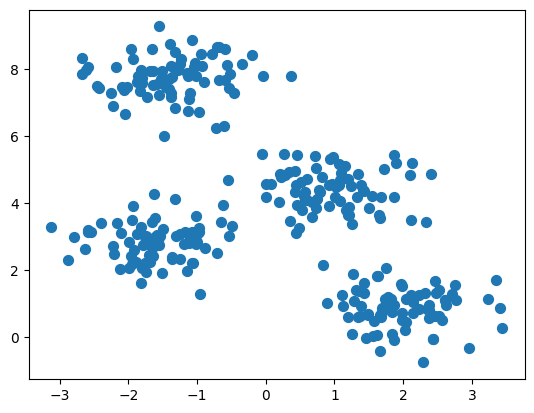

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs

# Function definition for make_blobs:
# make_blobs is a function in scikit-learn used to generate synthetic datasets with Gaussian blobs.
# It creates a specified number of samples and centers (clusters) with a given standard deviation.
# The function returns both the data points and their corresponding cluster labels.

# Generate synthetic data using make_blobs
# n_samples: Total number of data points to be generated
# centers: The number of clusters to generate (centers = 4 means 4 clusters)
# cluster_std: The standard deviation of the clusters, controlling the spread of data within each cluster
# random_state: Seed for reproducibility
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create a scatter plot of the data points
# X[:, 0]: Accesses the first feature (x-coordinate) of all data points
# X[:, 1]: Accesses the second feature (y-coordinate) of all data points
# s=50: Size of the markers in the scatter plot
plt.scatter(X[:, 0], X[:, 1], s=50)

# Display the plot
plt.show()


c:\Users\ghadf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


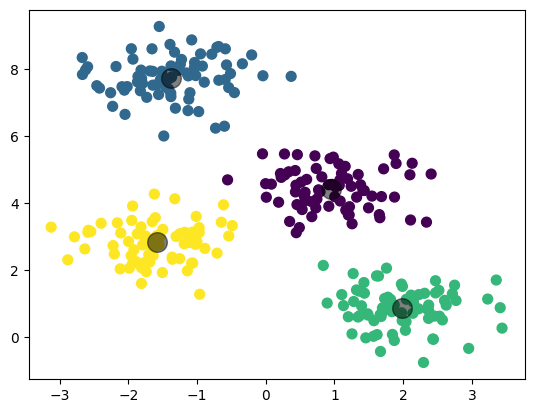

In [11]:
# Import necessary libraries
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

# Create a KMeans instance with 4 clusters
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to the data (X)
kmeans.fit(X)

# Predict the cluster labels for each data point
y_kmeans = kmeans.predict(X)

# Function definition for find_clusters:
# find_clusters is a custom implementation of the K-means algorithm.
# It aims to find the optimal cluster centers and labels for a given dataset X and a specified number of clusters.

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose initial cluster centers
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]  # Randomly choose 'n_clusters' points from the dataset
    centers = X[i]  # Initialize the cluster centers

    while True:
        # 2a. Assign labels to each data point based on the closest center
        labels = pairwise_distances_argmin(X, centers)  # Find the closest center for each data point

        # 2b. Find new centers by taking the mean of points belonging to each cluster
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])  # Calculate the mean of the points belonging to each cluster

        # 2c. Check for convergence by comparing new centers with old centers
        if np.all(centers == new_centers):  # If the centers do not change, break the loop
            break

        centers = new_centers  # Otherwise, update the cluster centers

    # Return the final cluster centers and labels
    return centers, labels

# Call the custom function find_clusters to get the cluster centers and labels
centers, labels = find_clusters(X, 4)

# Create a scatter plot of the data points, colored by their cluster assignments (labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Plot the final cluster centers in black, with larger markers and slight transparency (alpha)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Display the plot
plt.show()
